# Objects and references
Learning objectives
After this section

* You will be able to use different data structures for handling objects
* You will know how objects can be passed as arguments


Every value in Python is an object. Any object you create based on a class you've defined yourself works exactly the same as any "regular" Python object. For example, objects can be stored in a list:

In [4]:
from datetime import date

class CompletedCourse:

    def __init__(self, course_name: str, credits: int, completion_date: date):
        self.name = course_name
        self.credits = credits
        self.completion_date = completion_date


if __name__ == "__main__":
    # Here we create some completed courses and add these to a list 
    completed = []

    maths1 = CompletedCourse("Mathematics 1", 5, date(2020, 3, 11))
    prog1 = CompletedCourse("Programming 1", 6, date(2019, 12, 17))

    completed.append(maths1)
    completed.append(prog1)

    # Let's add a couple more straight to the list
    completed.append(CompletedCourse("Physics 2", 4, date(2019, 11, 10)))
    completed.append(CompletedCourse("Programming 2", 5, date(2020, 5, 19)))

    # Go through all the completed courses, print out their names 
    # and sum up the credits received
    credits = 0
    for course in completed:
        print(course.name)
        credits += course.credits

    print("Total credits received:", credits)

Mathematics 1
Programming 1
Physics 2
Programming 2
Total credits received: 20


## Programming exercise:
The fastest car


The exercise template contains a class named Car which represents the features of a car through two attributes: make (str) and top_speed (int).

Please write a function named fastest_car(cars: list) which takes a list of Car objects as its argument.

The function should return the make of the fastest car. You may assume there will always be a single car with the highest top speed. Do not change the list given as an argument, or make any changes to the Car class definition.

You may use the following code to test your function:

```python
if __name__ == "__main__":
    car1 = Car("Saab", 195)
    car2 = Car("Lada", 110)
    car3 = Car("Ferrari", 280)
    car4 = Car("Trabant", 85)

    cars = [car1, car2, car3, car4]
    print(fastest_car(cars))
```
Sample output
```console
Ferrari
```

In [5]:
class Car:
    def __init__(self, make: str, top_speed: int) -> None:
        self.make = make
        self.top_speed = top_speed

def fastest_car(cars: list):
    fastest = max(cars, key=lambda car: car.top_speed)
    return fastest.make    
        
if __name__ == "__main__":
    car1 = Car("Saab", 195)
    car2 = Car("Lada", 110)
    car3 = Car("Ferrari", 280)
    car4 = Car("Trabant", 85)

    cars = [car1, car2, car3, car4]
    print(fastest_car(cars))

Ferrari


## Programming exercise:Passing submissions


The exercise template contains a class named ExamSubmission which, as the name implies, models an examinee's submission in an exam. The class has two attributes defined: examinee (str) and points (int).

Please write a function named passed(submissions: list, lowest_passing: int) which takes a list of exam submissions and an integer number representing the lowest passing grade as its arguments.

The function should create and return a new list, which contains only the passed submissions from the original list. Please do not change the list given as an argument, or make any changes to the ExamSubmission class definition.

You may use the following code to test your function:

```python
if __name__ == "__main__":
    s1 = ExamSubmission("Peter", 12)
    s2 = ExamSubmission("Pippa", 19)
    s3 = ExamSubmission("Paul", 15)
    s4 = ExamSubmission("Phoebe", 9)
    s5 = ExamSubmission("Persephone", 17)

    passes = passed([s1, s2, s3, s4, s5], 15)
    for passing in passes:
        print(passing)
```

```console
ExamSubmission (examinee: Pippa, points: 19)
ExamSubmission (examinee: Paul, points: 15)
ExamSubmission (examinee: Persephone, points: 17)
```

In [6]:
class ExamSubmission:
    def __init__(self, examinee: str, points: int):
        self.examinee = examinee
        self.points = points

    def __str__(self):
        return f"ExamSubmission (examinee: {self.examinee}, points: {self.points})"


def passed(submissions: list, lowest_passing: int) -> list:
    new_list = []
    for item in submissions:
        if item.points >= lowest_passing:
            new_list.append(item)

    return new_list


if __name__ == "__main__":
    s1 = ExamSubmission("Peter", 12)
    s2 = ExamSubmission("Pippa", 19)
    s3 = ExamSubmission("Paul", 15)
    s4 = ExamSubmission("Phoebe", 9)
    s5 = ExamSubmission("Persephone", 17)

    passes = passed([s1, s2, s3, s4, s5], 15)
    for passing in passes:
        print(passing)

ExamSubmission (examinee: Pippa, points: 19)
ExamSubmission (examinee: Paul, points: 15)
ExamSubmission (examinee: Persephone, points: 17)


You may remember that lists do not contain any objects themselves. They contain references to objects. The exact same object can appear multiple times in a single list, and it can be referred to multiple times within the list or outside it. Let's have a look at an example:

In [7]:
class Product:
    def __init__(self, name: int, unit: str):
        self.name = name
        self.unit = unit


if __name__ == "__main__":
    shopping_list = []
    milk = Product("Milk", "litre")

    shopping_list.append(milk)
    shopping_list.append(milk)
    shopping_list.append(Product("Cucumber", "piece"))

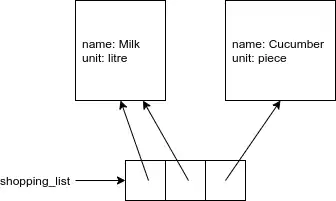
If there is more than one reference to the same object, it makes no difference which one of the references is used:

In [8]:
class Dog:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return self.name

dogs = []
fluffy = Dog("Fluffy")
dogs.append(fluffy)
dogs.append(fluffy)
dogs.append(Dog("Fluffy"))

print("Dogs initially:")
for dog in dogs:
    print(dog)

print("The dog at index 0 is renamed:")
dogs[0].name = "Pooch"
for dog in dogs:
    print(dog)

print("The dog at index 2 is renamed:")
dogs[2].name = "Fifi"
for dog in dogs:
    print(dog)

Dogs initially:
Fluffy
Fluffy
Fluffy
The dog at index 0 is renamed:
Pooch
Pooch
Fluffy
The dog at index 2 is renamed:
Pooch
Pooch
Fifi


The references at indexes 0 and 1 in the list refer to the same object. Either one of the references can be used to access the object. The reference at index 2 refers to a different object, albeit with seemingly the same contents. Changing the contents of this latter object does not affect the other one.

The operator is is used for checking if the two references refer to the exact same object, while the operator == will tell you if the contents of the objects are the same. The following example hopefully makes the difference clear:

In [9]:
list1 = [1, 2, 3]
list2 = [1, 2, 3]
list3 = list1

print(list1 is list2)
print(list1 is list3)
print(list2 is list3)

print()

print(list1 == list2)
print(list1 == list3)
print(list2 == list3)

False
True
False

True
True
True


Any Python object can also be stored in a dictionary or any other data structure. This also applies to objects created based on a class you've defined yourself.

In [10]:
class Student:
    def __init__(self, name: str, cr: int):
        self.name = name
        self.cr = cr

if __name__ == "__main__":
    # The key in this dictionary is the student number, 
    # and the value is an object of type Student
    students = {}
    students["12345"] = Student("Saul Student", 10)
    students["54321"] = Student("Sally Student", 67)

The [visualisation too]([https://](https://pythontutor.com/visualize.html#mode=display))l can help in making sense of the above example:

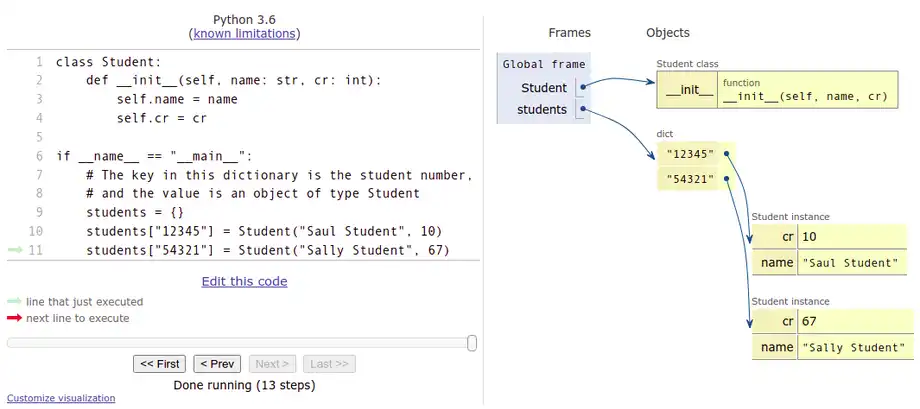

## Self or no self?
Thus far we've only touched upon the surface of using the self parameter name. Let's have a closer look at when it should or should not be used.

Below we have a simple class which lets us create a vocabulary object containing some words:

In [11]:
class Vocabulary:
    def __init__(self):
        self.words = []

    def add_word(self, word: str):
        if not word in self.words:
            self.words.append(word)

    def print_vocabulary(self):
        for word in sorted(self.words):
            print(word)

vocab = Vocabulary()
vocab.add_word("python")
vocab.add_word("object")
vocab.add_word("object-oriented programming")
vocab.add_word("object")
vocab.add_word("nerd")

vocab.print_vocabulary()

nerd
object
object-oriented programming
python


The list of words is stored in an attribute named self.words. In this case the self parameter name is mandatory in both the constructor method of the class and in any other method accessing that variable. If self is left out, the different methods will not access the same list of words.

Let's add a new method to our class definition. The method longest_word(self) returns (one of) the longest words in the vocabulary.

The following is one way of completing this task, but we will soon see it is not a very good way:

In [12]:
class Vocabulary:
    def __init__(self):
        self.words = []

    def add_word(self, word: str):
        if not word in self.words:
            self.words.append(word)

    def print_vocabulary(self):
        for word in sorted(self.words):
            print(word)

    def longest_word(self):
        # define two helper variables
        self.longest = ""
        self.length_of_longest = 0

        for word in self.words:
            if len(word) > self.length_of_longest:
                self.length_of_longest = len(word)
                self.longest = word

        return self.longest

This method uses two helper variables which are declared with the self parameter name. Remember, the names of variables do not matter in the functional sense, so these variables could also be named more confusingly as, for example, helper and helper2. The code begins to look a bit cryptic:

In [13]:
class Vocabulary:
    def __init__(self):
        self.words = []

    def add_word(self, word: str):
        if not word in self.words:
            self.words.append(word)

    def print_vocabulary(self):
        for word in sorted(self.words):
            print(word)

    def longest_word(self):
        # define two helper variables
        self.helper = ""
        self.helper2 = 0

        for word in self.words:
            if len(word) > self.helper2:
                self.helper2 = len(word)
                self.helper = word

        return self.helper

When a variable is declared with the self parameter name, it becomes an attribute of the object. This means that the variable will exist for as long as the object exists. Specifically, the variable will continue existing also after the method declaring it has finished its execution. In the example above this is quite unnecessary, as the helper variables are meant to be used only within the method longest_word(self). So, declaring helper variables with the self parameter name is not a very good idea here.

Besides causing variables to exist beyond their "expiration date", using self to create new attributes where they aren't necessary can cause difficult bugs in your code. Especially generically named attributes such as self.helper, which are then used in various different methods, can cause unexpected behaviour which is hard to trace.

For example, if a helper variable is declared as an attribute and assigned an initial value in the constructor, but the variable is then used in an unrelated context in another method, the results are often unpredictable:

In [14]:
class Vocabulary:
    def __init__(self):
        self.words = []
        # define helper variables
        self.helper = ""
        self.helper2 = ""
        self.helper3 = ""
        self.helper4 = ""

    # ...

    def longest_word(self):
        for word in self.words:
            # above the helper variables were all assigned string values
            # the following will not work because the type of helper2 is wrong
            if len(word) > self.helper2:
                self.helper2 = len(word)
                self.helper = word

        return self.helper




You might think this would be solved by just declaring attributes where they are used, outside the constructor, but this results in a situation where the attributes accessible through an object are dependent on which methods have been executed. In the previous part we saw that the advantage of declaring attributes in the constructor is that all instances of the class will then have the exact same attributes. If this is not the case, using different instances of the class can easily lead to errors.

In conclusion, if you need helper variables for use within a single method, the correct way to do it is without self. To make your code easier to understand, also use informative variable names:



In [ ]:


class Vocabulary:
    def __init__(self):
        self.words = []

    # ...

    def longest_word(self):
        # the correct way of declaring helper variables 
        # for use within a single method
        longest = ""
        length_of_longest = 0

        for word in self.words:
            if len(word) > length_of_longest:
                length_of_longest = len(word)
                longest = word

        return longest

        


In the above implementation the helper variables are only accessible while the method is being executed. The values stored within cannot cause complications in other parts of the program.



## Objects as arguments to functions
The objects created based on our own classes are usually mutable. You may remember that, for instance, Python lists are mutable: when passed as arguments to functions, their contents can change as a result of the execution.

Let's have a look at a simple example where a function receives a reference to an object of type Student as its argument. The function then changes the name of the student. Both the function and the main function calling it access the same object, so the change is apparent in the main function as well.


In [15]:

class Student:
    def __init__(self, name: str, student_number: str):
        self.name = name
        self.student_number = student_number

    def __str__(self):
        return f"{self.name} ({self.student_number})"

# the type hint here uses the name of the class defined above
def change_name(student: Student):
    student.name = "Saul Student"

# create a Student object
steve = Student("Steve Student", "12345")

print(steve)
change_name(steve)
print(steve)



Steve Student (12345)
Saul Student (12345)




It is also possible to create objects within functions. If a function returns a reference to the newly created object, it is also accessible within the main function:


In [16]:

from random import randint, choice

class Student:
    def __init__(self, name: str, student_number: str):
        self.name = name
        self.student_number = student_number

    def __str__(self):
        return f"{self.name} ({self.student_number})"

# This function creates and returns a new Student object.
# It randomly selects values for the name and the student number.
def new_student():
    first_names = ["Mark","Mindy","Mary","Mike"]
    last_names = ["Javanese", "Rusty", "Scriptor", "Pythons"]

    # randomly determine the name
    name = choice(first_names) + " " + choice(last_names)

    # randomly determine the student number
    student_number = str(randint(10000,99999))

    # Create and return a Student object
    return Student(name, student_number)

if __name__ == "__main__":
    # Call the function five times and store the results in a list
    students = []
    for i in range(5):
        students.append(new_student())

    # Print out the results
    for student in students :
        print(student)


Mindy Pythons (35653)
Mike Pythons (84070)
Mindy Javanese (93179)
Mike Javanese (51852)
Mindy Pythons (83175)


Executing the above could result in the following printout (NB: as randomness is involved, if you try the code yourself, the results will likely be different).

Sample output
Mary Rusty (78218)
Mindy Rusty (80068)
Mike Pythons (70396)
Mark Javanese (83307)
Mary Pythons (45149)



Objects as arguments to methods
Similarly, objects can act as arguments to methods. Let's have a look at an example from an amusement park:


In [17]:

class Person:
    def __init__(self, name: str, height: int):
        self.name = name
        self.height = height

class Attraction:
    def __init__(self, name: str, min_height: int):
        self.visitors = 0
        self.name = name
        self.min_height = min_height

    def admit_visitor(self, person: Person):
        if person.height >= self.min_height:
            self.visitors += 1
            print(f"{person.name} got on board")
        else:
            print(f"{person.name} was too short :(")

    def __str__(self):
        return f"{self.name} ({self.visitors} visitors)"


The Attraction contains a method admit_visitor, which takes an object of type Person as an argument. If the visitor is tall enough, they are admitted on board and the number of visitors is increased. The classes can be tested as follows:


In [18]:

rollercoaster = Attraction("Rollercoaster", 120)
jared = Person("Jared", 172)
alice = Person("Alice", 105)

rollercoaster.admit_visitor(jared)
rollercoaster.admit_visitor(alice)

print(rollercoaster)

Jared got on board
Alice was too short :(
Rollercoaster (1 visitors)


# Programming exercise:Baby Centre


NB: Some exercises have multiple parts, and you can receive points for the different parts separately. You can submit a partially completed exercise by choosing 'Submit Solution' from the menu next to the button for executing tests .

The exercise template contains a class named Person and a skeleton implementation for the class BabyCentre. A BabyCentre object performs various actions on a Person object. It may, for example, weigh or feed the person. In this exercise you will implement the rest of the BabyCentre class. Please do not change the class definition of Person in any way.

## Weighing persons
The BabyCentre class definition contains an outline for the function weigh:

```python
class BabyCentre:
    def weigh(self, person: Person):
        # return the weight of the person passed as an argument
        return -1
```
The method takes a Person object as its argument. It should return the weight of the person. You can access the weight of a person through the appropriate attribute defined in the Person class. Please fill in the rest of the implementation for the method weigh.

Below is an example of a main function where a BabyCentre weighs two separate Person objects:

```python
baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")
```
Sample output

```console
Eric weighs 7 kg
Peter weighs 85 kg
```

In [19]:
class Person:
    def __init__(self, name: str, age: int, height: int, weight: int):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight

class BabyCentre:
    def weigh(self, person: Person):
        # return the weight of the person passed as an argument
        return person.weight
    
baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")

Eric weighs 7 kg
Peter weighs 85 kg


## Feeding
It is possible to change the state of an object passed as an argument. Please implement the method feed(person: Person) which increases by one the weight of the person passed as an argument.

In the following example two persons are weighed, and then one of them is fed three times. Then the persons are weighed again:

```python
baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")
print() 

baby_centre.feed(eric)
baby_centre.feed(eric)
baby_centre.feed(eric)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")
```

The printout should reveal that Eric's weight has increased by three:

Sample output
```console
Eric weighs 7 kg
Peter weighs 85 kg

Eric weighs 10 kg
Peter weighs 85 kg
```

In [23]:
class Person:
    def __init__(self, name: str, age: int, height: int, weight: int):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight

class BabyCentre:
    def weigh(self, person: Person):
        # return the weight of the person passed as an argument
        return person.weight
    
    def feed(self, person: Person):
        person.weight += 1
    
baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")
print() 

baby_centre.feed(eric)
baby_centre.feed(eric)
baby_centre.feed(eric)

print(f"{eric.name} weighs {baby_centre.weigh(eric)} kg")
print(f"{peter.name} weighs {baby_centre.weigh(peter)} kg")

Eric weighs 7 kg
Peter weighs 85 kg

Eric weighs 10 kg
Peter weighs 85 kg


## Counting weigh-ins
Please implement the method weigh_ins() which returns the total number of weigh-ins a BabyCentre object has performed. NB: you will need a new attribute for keeping track of the number of weigh-ins. You can use the following code to test your method:

```python
baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")

baby_centre.weigh(eric)
baby_centre.weigh(eric)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")

baby_centre.weigh(eric)
baby_centre.weigh(eric)
baby_centre.weigh(eric)
baby_centre.weigh(eric)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")
```
Sample output
```console
Total number of weigh-ins is 0
Total number of weigh-ins is 2
Total number of weigh-ins is 6
```

In [24]:
class Person:
    def __init__(self, name: str, age: int, height: int, weight: int):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight

class BabyCentre:
    def __init__(self):
        self.number_of_weigh_ins = 0
    def weigh(self, person: Person):
        self.number_of_weigh_ins += 1
        # return the weight of the person passed as an argument
        return person.weight
    
    def feed(self, person: Person):
        person.weight += 1

    def weigh_ins(self):
        return self.number_of_weigh_ins
        
        

baby_centre = BabyCentre()

eric = Person("Eric", 1, 110, 7)
peter = Person("Peter", 33, 176, 85)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")

baby_centre.weigh(eric)
baby_centre.weigh(eric)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")

baby_centre.weigh(eric)
baby_centre.weigh(eric)
baby_centre.weigh(eric)
baby_centre.weigh(eric)

print(f"Total number of weigh-ins is {baby_centre.weigh_ins()}")

Total number of weigh-ins is 0
Total number of weigh-ins is 2
Total number of weigh-ins is 6


# Programming exercise:LunchCard and PaymentTerminal


NB: Some exercises have multiple parts, and you can receive points for the different parts separately. You can submit a partially completed exercise by choosing 'Submit Solution' from the menu next to the button for executing tests .

In the previous part there was an exercise where you implemented the class LunchCard. The card had separate methods for eating a regular and a special lunch, along with a method for depositing money on the card.

The LunchCard class, as you were asked to implement it, has some problems, however. The card itself had knowledge of the prices of the different lunch options, and knew to subtract the right amount of money from the balance based on these. But imagine the prices changed, or there were new items introduced to the system, but several cards were already registered in the system. This would mean all existing cards would need to be replaced by versions with knowledge of the new prices.

A better solution would be to make the cards "stupid", ignorant of the prices of different products. The purpose of the card would be to simply keep track of the available balance. All more complicated features should be contained within another class: the payment terminal.

## A simpler LunchCard
Let's first implement a simpler version of the LunchCard class. The card should contain functionality only for finding out the current balance, depositing money on the card, and subtracting from the balance. Please fill in the subtract_from_balance(amount) method in the exercise template according to the instructions in the comments:

```python
class LunchCard:
    def __init__(self, balance: float):
        self.balance = balance

    def deposit_money(self, amount: float):
        self.balance += amount

    def subtract_from_balance(self, amount: float):
        pass
        # The amount should be subtracted from the balance only if
        # there is enough money on the card.
        # If the payment is successful, the method returns True. 
        # Otherwise it returns False.
```
You may use the following code to test your function:

```python
if __name__ == "__main__":
    card = LunchCard(10)
    print("Balance", card.balance)
    result = card.subtract_from_balance(8)
    print("Payment successful:", result)
    print("Balance", card.balance)
    result = card.subtract_from_balance(4)
    print("Payment successful:", result)
    print("Balance", card.balance)
```
Sample output
```console
Balance 10
Payment successful: True
Balance 2
Payment successful: False
Balance 2
```

In [28]:
class LunchCard:
    def __init__(self, balance: float):
        """
        Initialize a LunchCard instance with the given balance.

        Args:
            balance (float): The initial balance of the LunchCard.
        """
        self.balance = balance

    def deposit_money(self, amount: float):
        """
        Deposit the specified amount of money into the LunchCard balance.

        Args:
            amount (float): The amount of money to be deposited.
        """
        self.balance += amount

    def subtract_from_balance(self, amount: float) -> bool:
        """
        Subtract the specified amount from the LunchCard balance.

        Args:
            amount (float): The amount of money to be subtracted.

        Returns:
            bool: True if the payment is successful (balance is sufficient), False otherwise.
        """
        if self.balance >= amount:
            self.balance -= amount
            return True
        else:
            return False


if __name__ == "__main__":
    card = LunchCard(10)
    print("Balance", card.balance)
    result = card.subtract_from_balance(8)
    print("Payment successful:", result)
    print("Balance", card.balance)
    result = card.subtract_from_balance(4)
    print("Payment successful:", result)
    print("Balance", card.balance)

Balance 10
Payment successful: True
Balance 2
Payment successful: False
Balance 2


## The payment terminal and dealing with cash payments
In the student cafeteria it is possible to pay with either cash or a LunchCard. A payment terminal is used to handle both cash and card transactions. Let's start with the cash transactions.

Here we have a skeleton implementation for a PaymentTerminal class. Please implement the methods as described in the comments:

```python
class PaymentTerminal:
    def __init__(self):
        # Initially there is 1000 euros in cash available at the terminal
        self.funds = 1000
        self.lunches = 0
        self.specials = 0

    def eat_lunch(self, payment: float):
        # A regular lunch costs 2.50 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.

    def eat_special(self, payment: float):
        # A special lunch costs 4.30 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
```
You may use the following code to test your class:

```python
exactum = PaymentTerminal()

change = exactum.eat_lunch(10)
print("The change returned was", change)

change = exactum.eat_lunch(5)
print("The change returned was", change)

change = exactum.eat_special(4.3)
print("The change returned was", change)

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)
```
Sample output
```console
The change returned was 7.5
The change returned was 2.5
The change returned was 0.0
Funds available at the terminal: 1009.3
Regular lunches sold: 2
Special lunches sold: 1
```

In [27]:
class PaymentTerminal:
    def __init__(self):
        # Initially there is 1000 euros in cash available at the terminal
        self.funds = 1000
        self.lunches = 0
        self.specials = 0

    def eat_lunch(self, payment: float):
        # A regular lunch costs 2.50 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.lunches += 1
            self.funds += 2.50
            change = payment - 2.50
        else:
            change = payment

        return change
        

    def eat_special(self, payment: float):
        # A special lunch costs 4.30 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.specials += 1
            self.funds += 4.30
            change = payment - 4.30
        else:
            change = payment

        return change

exactum = PaymentTerminal()

change = exactum.eat_lunch(10)
print("The change returned was", change)

change = exactum.eat_lunch(5)
print("The change returned was", change)

change = exactum.eat_special(4.3)
print("The change returned was", change)

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)

The change returned was 7.5
The change returned was 2.5
The change returned was 0.0
Funds available at the terminal: 1009.3
Regular lunches sold: 2
Special lunches sold: 1


## Dealing with card transactions
Now let's implement card transactions. We will need methods which take a LunchCard as an argument, and reduce the balance on the card by the price of the lunch. Below you will find the outlines of these functions. Please fill in the methods as described in the comments:

```python
class PaymentTerminal:
    # ...

    def eat_lunch_lunchcard(self, card: LunchCard):
        # A regular lunch costs 2.50 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False.


    def eat_special_lunchcard(self, card: LunchCard):
        # A special lunch costs 4.30 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False.
```
NB: when paying with a LunchCard the cash funds available at the terminal do not change. However, the lunches are still sold whenever there is the required balance available, so remember to increase the number of lunches sold appropriately.

You may use the following code to test your class:

```python
exactum = PaymentTerminal()

change = exactum.eat_lunch(10)
print("The change returned was", change)

card = LunchCard(7)

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
result = exactum.eat_lunch_lunchcard(card)
print("Payment successful:", result)

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)
```
Sample output
```console
The change returned was 7.5
Payment successful: True
Payment successful: False
Payment successful: True
Funds available at the terminal: 1002.5
Regular lunches sold: 2
Special lunches sold: 1
```

In [32]:
class PaymentTerminal:
    def __init__(self):
        # Initially there is 1000 euros in cash available at the terminal
        self.funds = 1000
        self.lunches = 0
        self.specials = 0

    def eat_lunch(self, payment: float):
        # A regular lunch costs 2.50 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.lunches += 1
            self.funds += 2.50
            change = payment - 2.50
        else:
            change = payment

        return change
        

    def eat_special(self, payment: float):
        # A special lunch costs 4.30 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.specials += 1
            self.funds += 4.30
            change = payment - 4.30
        else:
            change = payment

        return change
    
    def eat_lunch_lunchcard(self, card: LunchCard):
        # A regular lunch costs 2.50 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False.
        if card.balance > 2.50:
            self.lunches += 1
            card.subtract_from_balance(2.50)
            return True
        else:
            return False




    def eat_special_lunchcard(self, card: LunchCard):
        # A special lunch costs 4.30 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False. 
        if card.balance > 4.30:
            self.specials += 1
            card.subtract_from_balance(4.30)
            return True
        else:
            return False   


exactum = PaymentTerminal()

change = exactum.eat_lunch(10)
print("The change returned was", change)

card = LunchCard(7)

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
result = exactum.eat_lunch_lunchcard(card)
print("Payment successful:", result)

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)

The change returned was 7.5
Payment successful: True
Payment successful: False
Payment successful: True
Funds available at the terminal: 1002.5
Regular lunches sold: 2
Special lunches sold: 1


## Depositing money on the card
Finally, let's add a method which lets you deposit money on the card. The card owner pays this by cash, so the deposited sum is added to the funds available at the terminal. Here is an outline for the method:

```python
def deposit_money_on_card(self, card: LunchCard, amount: float):
    pass
```
You may use the following code to test your method:

```python
exactum = PaymentTerminal()

card = LunchCard(2)
print(f"Card balance is {card.balance} euros")

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)

exactum.deposit_money_on_card(card, 100)
print(f"Card balance is {card.balance} euros")

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
print(f"Card balance is {card.balance} euros")

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)
```
Sample output
```console
Card balance is 2 euros
Payment successful: False
Card balance is 102 euros
Payment successful: True
Card balance is 97.7 euros
Funds available at the terminal: 1100
Regular lunches sold: 0
Special lunches sold: 
```

In [35]:
class PaymentTerminal:
    def __init__(self):
        # Initially there is 1000 euros in cash available at the terminal
        self.funds = 1000
        self.lunches = 0
        self.specials = 0

    def eat_lunch(self, payment: float):
        # A regular lunch costs 2.50 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.lunches += 1
            self.funds += 2.50
            change = payment - 2.50
        else:
            change = payment

        return change
        

    def eat_special(self, payment: float):
        # A special lunch costs 4.30 euros.
        # Increase the value of the funds at the terminal by the 
        # price of the lunch, increase the number of lunches sold, 
        # and return the appropriate change.
        # If the payment passed as an argument is not large enough to cover
        # the price, the lunch is not sold, and the entire sum is returned.
        if payment > 2.50:
            self.specials += 1
            self.funds += 4.30
            change = payment - 4.30
        else:
            change = payment

        return change
    
    def eat_lunch_lunchcard(self, card: LunchCard):
        # A regular lunch costs 2.50 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False.
        if card.balance > 2.50:
            self.lunches += 1
            card.subtract_from_balance(2.50)
            return True
        else:
            return False




    def eat_special_lunchcard(self, card: LunchCard):
        # A special lunch costs 4.30 euros.
        # If there is enough money on the card, 
        # subtract the price of the lunch from the balance
        # and return True. If not, return False. 
        if card.balance > 4.30:
            self.specials += 1
            card.subtract_from_balance(4.30)
            return True
        else:
            return False  

    def deposit_money_on_card(self, card: LunchCard, amount: float):
        card.deposit_money(amount)
        self.funds += amount


exactum = PaymentTerminal()

card = LunchCard(2)
print(f"Card balance is {card.balance} euros")

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)

exactum.deposit_money_on_card(card, 100)
print(f"Card balance is {card.balance} euros")

result = exactum.eat_special_lunchcard(card)
print("Payment successful:", result)
print(f"Card balance is {card.balance} euros")

print("Funds available at the terminal:", exactum.funds)
print("Regular lunches sold:", exactum.lunches)
print("Special lunches sold:", exactum.specials)

Card balance is 2 euros
Payment successful: False
Card balance is 102 euros
Payment successful: True
Card balance is 97.7 euros
Funds available at the terminal: 1100
Regular lunches sold: 0
Special lunches sold: 1


# An instance of the same class as an argument to a method
Below we have yet another version of the class Person:


In [1]:

class Person:
    def __init__(self, name: str, year_of_birth: int):
        self.name = name
        self.year_of_birth = year_of_birth


Let's assume we want to write a program which compares the ages of objects of type Person. We could write a separate function for this purpose:


In [7]:
class Person:
    def __init__(self, name: str, year_of_birth: int):
        self.name = name
        self.year_of_birth = year_of_birth

def older_than(person1: Person, person2: Person):
    if person1.year_of_birth < person2.year_of_birth:
        return True
    else:
        return False

muhammad = Person("Muhammad ibn Musa al-Khwarizmi", 780)
pascal = Person("Blaise Pascal", 1623)
grace = Person("Grace Hopper", 1906)

if older_than(muhammad, pascal):
    print(f"{muhammad.name} is older than {pascal.name}")
else:
    print(f"{muhammad.name} is not older than {pascal.name}")

if older_than(grace, pascal):
    print(f"{grace.name} is older than {pascal.name}")
else:
    print(f"{grace.name} is not older than {pascal.name}")


Muhammad ibn Musa al-Khwarizmi is older than Blaise Pascal
Grace Hopper is not older than Blaise Pascal


Sample output
Muhammad ibn Musa al-Khwarizmi is older than Blaise Pascal
Grace Hopper is not older than Blaise Pascal



One of the principles of object oriented programming is to include any functionality which handles objects of a certain type in the class definition, as methods. So instead of a function we could write a method which allows us to compare the age of a Person object to another Person object:


In [3]:

class Person:
    def __init__(self, name: str, year_of_birth: int):
        self.name = name
        self.year_of_birth = year_of_birth

    # NB: type hints must be enclosed in quotation marks if the parameter
    # is of the same type as the class itself!
    def older_than(self, another: "Person"):
        if self.year_of_birth < another.year_of_birth:
            return True
        else:
            return False


Here the object which the method is called on is referred to as self, while the other Person object is another.

Remember, calling a method differs from calling a function. A method is attached to an object with the dot notation:


In [4]:

muhammad = Person("Muhammad ibn Musa al-Khwarizmi", 780)
pascal = Person("Blaise Pascal", 1623)
grace = Person("Grace Hopper", 1906)

if muhammad.older_than(pascal):
    print(f"{muhammad.name} is older than {pascal.name}")
else:
    print(f"{muhammad.name} is not older than {pascal.name}")

if grace.older_than(pascal):
    print(f"{grace.name} is older than {pascal.name}")
else:
    print(f"{grace.name} is not older than {pascal.name}")


Muhammad ibn Musa al-Khwarizmi is older than Blaise Pascal
Grace Hopper is not older than Blaise Pascal


To the left of the dot is the object itself, which is referred to as self within the method definition. In parentheses is the argument to the method, which is the object referred to as another.

The printout from the program is exactly the same as with the function implementation above.

A rather cosmetic point to finish off: the if...else structure in the method older_than is by and large unneccessary. The value of the Boolean expression in the condition is already the exact same truth value which is returned. The method can thus be simplified:


In [8]:

class Person:
    def __init__(self, name: str, year_of_birth: int):
        self.name = name
        self.year_of_birth = year_of_birth

    # NB: type hints must be enclosed in quotation marks if the parameter 
    # is of the same type as the class itself!
    def older_than(self, another: "Person"):
        return self.year_of_birth < another.year_of_birth


As stated in the comments in the examples above, if the parameter in a method definition is of the same type as the class itself, the type hint must be enclosed in quotation marks. Leaving the quotation marks out causes an error, which you will see if you try the following:


In [ ]:

class Person:
    # ...

    # this would cause an error, as Person must be enclosed in quotation marks
    def older_than(self, another: Person):
        return self.year_of_birth < another.year_of_birth

# Programming exercise:Comparing properties

NB: Some exercises have multiple parts, and you can receive points for the different parts separately. You can submit a partially completed exercise by choosing 'Submit Solution' from the menu next to the button for executing tests .

The database of a real estate agency keeps records of available properties with objects defined by the following class:

```python
class RealProperty:
    def __init__(self, rooms: int, square_metres: int, price_per_sqm: int):
        self.rooms = rooms
        self.square_metres = square_metres
        self.price_per_sqm = price_per_sqm
```
Your task is to implement methods which allow for comparison between available properties.

## Is it bigger?
Please write a method named bigger(self, compared_to) which returns True if the RealProperty object itself is bigger than the one it is compared to.

An example of how the function should work:

```python
central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.bigger(downtown_two_bedroom))
print(suburbs_three_bedroom.bigger(downtown_two_bedroom))
```
Sample output
```console
False
True
```

In [9]:
class RealProperty:
    def __init__(self, rooms: int, square_metres: int, price_per_sqm: int):
        self.rooms = rooms
        self.square_metres = square_metres
        self.price_per_sqm = price_per_sqm

    def bigger(self, compared_to: "RealProperty") -> bool:
        if self.square_metres > compared_to.square_metres:
            return True
        else:
            return False

central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.bigger(downtown_two_bedroom))
print(suburbs_three_bedroom.bigger(downtown_two_bedroom))

False
True


## Price difference
Please write a method named price_difference(self, compared_to) which returns the difference in price between the RealProperty object itself and the one it is compared to. The price difference is the absolute value of the difference between the total prices of the two properties. The total price of a property is its price per square metre multiplied by the amount of square metres in the property.

An example of how the function should work:

```python
central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.price_difference(downtown_two_bedroom))
print(suburbs_three_bedroom.price_difference(downtown_two_bedroom))
```
Sample output
```console
71600
35400
```

In [15]:
class RealProperty:
    def __init__(self, rooms: int, square_metres: int, price_per_sqm: int):
        self.rooms = rooms
        self.square_metres = square_metres
        self.price_per_sqm = price_per_sqm

    def bigger(self, compared_to: "RealProperty") -> bool:
        if self.square_metres > compared_to.square_metres:
            return True
        else:
            return False
    def total_price(self):
        return self.price_per_sqm  * self.square_metres
        
    def price_difference(self, compared_to: "RealProperty"):
        return abs(self.total_price() - compared_to.total_price())

central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.price_difference(downtown_two_bedroom))
print(suburbs_three_bedroom.price_difference(downtown_two_bedroom))

71600
35400


## Is it more expensive?
Please write a method named more_expensive(self, compared_to) which returns True if the RealProperty object itself is more expensive that the one it is compared to.

An example of how the function should work:

```python
central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.more_expensive(downtown_two_bedroom))
print(suburbs_three_bedroom.more_expensive(downtown_two_bedroom))
```
Sample output
```console
False
True
```

In [16]:
class RealProperty:
    def __init__(self, rooms: int, square_metres: int, price_per_sqm: int):
        self.rooms = rooms
        self.square_metres = square_metres
        self.price_per_sqm = price_per_sqm

    def bigger(self, compared_to: "RealProperty") -> bool:
        if self.square_metres > compared_to.square_metres:
            return True
        else:
            return False
    def total_price(self):
        return self.price_per_sqm  * self.square_metres
        
    def price_difference(self, compared_to: "RealProperty"):
        return abs(self.total_price() - compared_to.total_price())
    
    def more_expensive(self, compared_to: "RealProperty") -> bool:
        if self.total_price() > compared_to.total_price():
            return True
        else:
            return False

central_studio = RealProperty(1, 16, 5500)
downtown_two_bedroom = RealProperty(2, 38, 4200)
suburbs_three_bedroom = RealProperty(3, 78, 2500)

print(central_studio.more_expensive(downtown_two_bedroom))
print(suburbs_three_bedroom.more_expensive(downtown_two_bedroom))

False
True
